In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Read the CSV file into a pandas dataframe.

In [2]:
df = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv')
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


2. 
    Add columns to the dataframe containing: ( 3 pt)
    
    i. The total (East + West) bicycle count
    
    ii. The hour of the day
    
    iii. The year

In [3]:
#function to convert from 12 to 24 hour format. Using this instead of inbuild Datetimeindex as it is faster
def parse_values(x):
    y = x.split(" ")
    if y[1] == 'PM' and y[0] != '12':
        return int(y[0]) + 12
    elif y[1] == 'AM' and y[0] == '12':
        return int(y[0]) - 12
    else:
        return int(y[0])

In [4]:
date_split = df['Date'].str.split(" ")

hour = date_split.str[1].str.split(":").str[0] #getting the hour of the day
combined_hr= hour.str.cat(date_split.str[2],sep=" ") # combining hour with am pm

#converting from 12 to 24 hour clock
df['hour_of_day'] = combined_hr.apply(parse_values)

df['year'] = date_split.str[0].str.split("/").str[2]
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,hour_of_day,year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,4,2012


3. Create a dataframe with the subset of data from the year 2016

In [5]:
df_2016 = df[df['year']=='2016']
df.shape
df_2016.shape

(8784, 6)

4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) 

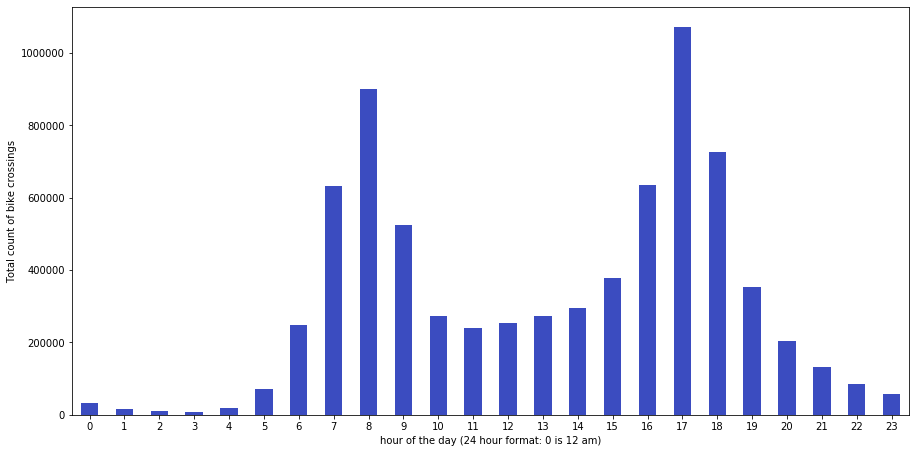

In [6]:
hour_count = df.groupby(['hour_of_day'])['Fremont Bridge Total'].agg('sum')
ax = hour_count.plot.bar(figsize=(15,7.5), colormap='coolwarm',rot=False)
plt.ylabel('Total count of bike crossings')
plt.xlabel('hour of the day (24 hour format: 0 is 12 am)')
plt.show()

5. Use pandas to determine what is (on average) the busiest hour of the day

In [7]:
df.groupby(['hour_of_day'])['Fremont Bridge Total'].agg('mean').idxmax() 

17

5 PM is on average the busiest hour of the day.